In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

Prepear our n11 dataset

In [136]:
import pandas as pd
f = open(b"C:\Users\Undefined\Desktop\comments.txt",'r',encoding='utf-8')
text = f.readlines()
liste = []
for line in text:
    temp = line.strip().split(' ',1)
    liste.append(temp)
df = pd.DataFrame(liste)
valid = pd.DataFrame([])
df.columns = ["label","comment"]
print(df.head(50))
df.to_csv("n11CommentDataset.csv", index=False)

   label                                            comment
0      1            teşekkür ederim bir daha ğörüşmek üzere
1      1  HIZLI KARGO, GÜVENİLİR MAĞAZA. SIFIR, SORUNSUZ...
2      1  çok anlamam telefondan aldık kullacnacaz işte....
3      1                                    Evet ürün güzel
4      1               Faturam gelmedi yardımcı olurmusunuz
5      1  Telefonu annem için aldık.ihtiyaçları karşılıy...
6      1                         GÜZEL ÜRÜN TAVSİYE EDERİM.
7      0                             urun guzel magaza kotu
8      1                   Evet beğendim çok güzel ve uygun
9      1  Ürün şimdilik sorunsuz memnun kaldım. Teşekkür...
10     1  Ürün güzel tam istediğim geldi özen le ambalaj...
11     1  güvenilir ve sorunsuz alışveriş fatura mail le...
12     1  her daim bunu bilir bunu söylerim eğer android...
13     1                   Teşekkür ederim emeğinize sağlık
14     1  Ürünü eşime, almıştık. Kesinlikle bayıldık, çe...
15     1  Arkadaşlar bu telefon almak iç

In [137]:
df = pd.read_csv("n11CommentDataset.csv")

In [138]:
df.head(5)

,label,comment
0,1,teşekkür ederim bir daha ğörüşmek üzere
1,1,"HIZLI KARGO, GÜVENİLİR MAĞAZA. SIFIR, SORUNSUZ..."
2,1,çok anlamam telefondan aldık kullacnacaz işte....
3,1,Evet ürün güzel
4,1,Faturam gelmedi yardımcı olurmusunuz


In [139]:
df = df.sort_values('label')

In [140]:
df.groupby('label').count()

,comment
label,
0,1284
1,6597


In [141]:
negative_comments = df[0:1285]

In [85]:
negative_comments

,label,comment
7889,0,PİL CANAVARI... BEĞENDİM.
7065,0,memnun kalmadım
7066,0,FATURAYA DIKKAT EDİN GONDERMEYEBILIYOLAR
7067,0,şleri bittikten sonra hiç yardımcı olmuyolar u...
7068,0,15 günden fazla zaman geçmesine rağmen fatura ...
...,...,...
7482,0,şark kurnazlığı yapıyorlar. kargo tarihi yakın...
7492,0,ürün güzel fakat benim gibi fazla para vererek...
7479,0,performans güzel fakat arayüzü kötü
7480,0,Telefonun imei'nin kayıtlı olmadığı mesajı geldi.


In [142]:
df = df.append(negative_comments)

In [143]:
df = df.sort_values('label')

In [144]:
df.groupby('label').count()

,comment
label,
0,2566
1,6597


In [89]:
poz_com_size = df.groupby('label').count()["comment"][1]
neg_com_size = df.groupby('label').count()["comment"][0]
poz_com_size, neg_com_size

(6597, 2566)

In [91]:
cut_poz = int(0.3 * poz_com_size) + 1
cut_neg = int(0.3 * neg_com_size) + 1

In [100]:
poz_com_size, poz_com_size-cut_poz, cut_poz, neg_com_size, neg_com_size-cut_neg, cut_neg 

(6597, 4617, 1980, 2566, 1796, 770)

In [145]:
neg_df_valid = df[:cut_neg]
neg_df_train = df[cut_neg:neg_com_size] 
poz_df_valid = df[neg_com_size:neg_com_size+cut_poz] 
poz_df_train = df[neg_com_size+cut_poz:] 

df_train = pd.concat([neg_df_train, poz_df_train])
df_valid = pd.concat([neg_df_valid, poz_df_valid])


df_train = df_train.iloc[np.random.permutation(len(df_train))]
df_valid = df_valid.iloc[np.random.permutation(len(df_valid))]

In [146]:
len(df_train), len(df_valid)

(6425, 2750)

In [153]:
df_train.isnull().any()


label      False
comment     True
dtype: bool

In [154]:
df_train.isnull().sum()

label       0
comment    10
dtype: int64

In [149]:
null_rows = df["comment"].isnull()
df[:][null_rows]

,label,comment
7630,0,NaN
7640,0,NaN
7707,0,NaN
7707,0,NaN
7640,0,NaN
7630,0,NaN
2712,1,NaN
2595,1,NaN
4049,1,NaN
5174,1,NaN


In [156]:
df.dropna(axis=0,inplace=True)
df.isnull().any()

label      False
comment    False
dtype: bool

In [157]:
df_train.to_csv("n11CommentDataset_train.csv", index=False)
df_valid.to_csv("n11CommentDataset_valid.csv", index=False)

In [3]:
df_train = pd.read_csv("n11CommentDataset_train.csv")
df_valid = pd.read_csv("n11CommentDataset_valid.csv")

In [4]:
data_lm = TextLMDataBunch.from_df('.', train_df=df_train, valid_df= df_valid, label_cols="label", text_cols="comment")

In [5]:
data_lm.save('data_lm_n11.pkl')

In [5]:
data_lm.show_batch()

idx,text
0,ve portre modu.3-i̇şlemci.4-ses kalitesi.5 - 4 g indirme hızı.6-bildirim ışığı . xxmaj şarj konusunda endişem vardı ancak oda yersizmiş . xxmaj birgün çok rahat çıkarttı . xxbos evet istediğim gibi xxbos xxmaj evet güzel ürün herkeze tavsiye ederim xxbos evet urun beğendim çok iyi a50 alacagina bunu al beğendim fakat tel 8 gün sonunda ele geçti.iletisim sıfır . mesaj atmama rağmen geri dökülmüyor 8 tane mesajdan sadece 2 sine yarılayamamak
1,"yerine gözle net olarak gözüküyor kusurlu geldi alternatif telefon olmadığı için geri yollamadım bu şekilde kullanacam artik xxbos xxmaj ürün iyi , fakat kutudan xxmaj xiaomi xxmaj türkiye xxmaj garanti xxmaj belgesi çıkmadı , xxup kvk garanti belgesi çıktı . xxup kvk distribütörmüş , xxmaj umarım sorun çıkmaz . . xxbos 03.06.2018 tarihinde aldım kullanmadan hiç birşeye yorum yapmam zaman 1750 tl almıştım doların yükselmesiyle şuan 450 lira fark var"
2,"güzel hiçbir sıkıntı yok bu fiyata alınabilecek en iyi ürün ( 1.200tl ) xxbos başarılı bir ürün xxbos xxmaj ürün ve iletişimi güzel fakat kulaklık ve adaptör çok basit maalesef , yanında ekran koruyucu gelmemesi hayal kırıklığı xxbos xxmaj hızlı kargo ilgili satıcı teşekkürler . xxbos xxmaj ürünü beğendik . xxmaj çalışılan kargo şirketi ( xxup mng ) xxmaj konya il merkezinde nedense kargoyu belirli günlerde çıkarıyormuş . xxmaj bu"
3,"xxunk telefonu aktive ettiğim gibi güncelleme geldi . xxbos xxmaj xxunk bir ürün alacak olanlar düşünmeden alabilir xxbos arızalı şarj cihazı xxbos xxmaj apple garantili orijinal ürün gönderildi . xxbos urun guzel magaza kotu xxbos xxmaj güzel ürün , hızlı kargo sağlam paketleme , ayrıca ufak bir problemimiz vardı onuda telefonla çözdüler sağolsunlar .. xxmaj üründe oldukça güzel ve şık xxbos xxmaj evet nefesim anlatıldığı gibi xxbos xxmaj ürün siparisn"
4,performansı çok iyi . daha yüksek fiyatları dahi hak ediyor bence xxunk . xxbos anlatmaya gerek yok xxbos fp açısından çok iyi bi cihaz . fiyatının xxunk kat kat veriyor xxbos xxmaj daha iyisi şamda kayısı 😁 xxbos xxmaj zaten kullandığım bi telefondu . xxmaj kızım için aldım . xxmaj telefon her yönüyle güzel . xxmaj tavsiye ederim xxbos ürün beklediğim gibi kesinlikle xxunk ederim xxbos tereddüt etmeden alabilirsiniz xxbos


In [6]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained=False, drop_mult=0.7, pretrained_fnames=["TurkishLM", "Turkish_LM_itos"])

In [8]:
learn.summary

<bound method model_summary of LanguageLearner(data=TextLMDataBunch;

Train: LabelList (6415 items)
x: LMTextList
xxbos xxmaj ürünün şık görünümü , kullanıcıya hitap eden özellikleri güzel bir ürün honor 10 lite magazaya teşekkürler . xxmaj kullanmaya yeni başladım gerçekten beğenilen bir telefon .,xxbos bence fatura ıle ılgılı sıkıntı yapıyolar guvenmeyın derım ben artık bu fırmadan almıyorum,xxbos xxup lg xxup g7 thinq’i tercih etme sebeplerim ise xxup 1-ips xxup lcd ekranın p - xxmaj oled ekrana göre daha uzun ömürlü olması . 2-ön kamera ve portre modu.3-i̇şlemci.4-ses kalitesi.5 - 4 g indirme hızı.6-bildirim ışığı . xxmaj şarj konusunda endişem vardı ancak oda yersizmiş . xxmaj birgün çok rahat çıkarttı .,xxbos evet istediğim gibi,xxbos xxmaj evet güzel ürün herkeze tavsiye ederim
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (2748 items)
x: LMTextList
xxbos xxunk xxunk kullanıyorum çok güzel ama kulaklığı güzel değil şarz cihaz kablosu da güze değil biraz daha kaliteli olabilirdi

In [164]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


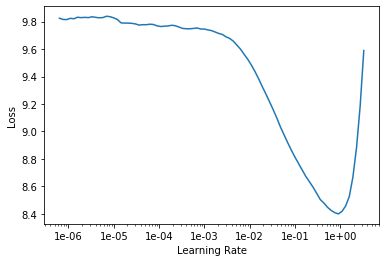

In [165]:
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,7.572574,7.400965,0.085714,00:30
1,6.774595,6.811920,0.114286,00:30


In [13]:
learn.save('fit_head')

In [14]:
learn.unfreeze()

In [15]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,6.205812,6.656069,0.128571,00:31
1,6.058472,6.259167,0.142857,00:31
2,5.804205,5.864965,0.142857,00:31
3,5.562445,5.580588,0.185714,00:31
4,5.357467,5.482171,0.214286,00:31
5,5.196960,5.359200,0.185714,00:31
6,5.066019,5.290712,0.200000,00:31
7,4.974281,5.265240,0.200000,00:31
8,4.907134,5.234507,0.200000,00:31
9,4.869724,5.236213,0.200000,00:31


In [16]:
learn.save('fine_tuned')

In [17]:
TEXT = "bu telefonu beğenmedim çünkü"
N_WORDS = 40
N_SENTENCES = 2

In [18]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

bu telefonu beğenmedim çünkü 1 günde 2 ay ışığında bir telefon . 2 yıl boyunca hiç sorun yok , ne tutturursak kadar düşük değil ama bana bu fırmadan . xxbos Ürün tam istediğim gibi . Ekran tam rahatça orijinal ürün anlatıldığı gibi
bu telefonu beğenmedim çünkü portre xxbos Telefon çok güzel . Ürün güzel fakat teşekkürler xxbos ben ürünü beğendim ama hiç beğenmedim ürün . iphone 8 günde 2000 TL ye atın garanti belgesi var . xxbos Bu paraya alınabilecek en iyi


In [19]:
learn.save_encoder('fine_tuned_enc')

In [7]:
data_clas=TextClasDataBunch.from_df(path='.',train_df=df_train, valid_df=df_valid, vocab=data_lm.vocab, label_cols='label', text_cols='comment')
data_clas.save('data_clas.pkl')

In [3]:
data_clas = load_data('.', 'data_clas.pkl', bs=16)

In [6]:
data_clas.show_batch()

text,target
xxbos xxmaj bence bu fiyata alınabilecek en iyi telefon . xxmaj arasında kaldığım diğer telefonlardan xxunk xxunk özellikleri şunlar oldu : 1 . xxmaj snapdragon 835 xxunk xxunk : xxmaj telefon canavar gibi bu xxunk . xxmaj diğer xxunk performans ve hız açısından xxunk yanına xxunk . 2 . xxmaj malzeme kalitesi : xxmaj telefonun en az 4 - 5 yıl xxunk için önemli bir husus . xxmaj telefon cam,1
"xxbos xxmaj fiyat ve ürün şahane . xxmaj fakat lg'ye yapılan bu algı ve önyargıların gereksiz fazla olduğunu bu telefonu alınca farkettim . xxmaj neden derseniz zamanında xxup g3 ve xxup g4 te olan sorunların lg'nin bütün ürünlere maal edilmesi bence çok gereksiz ve bu üründe dahil lg'nin sadece ülkemizde düzgün satışı gerçekleşmiyor . xxmaj bu cihazı alırken bir sürü araştırma yaptım , gerek yorumlar olsun gerek testler olsun ülkemiz",1
"xxbos xxmaj nfc özelliği şarttı bana bu bantta en uygun nfcli ekran gövde oranlı çentikli telefon . xxmaj çentik modern tutuyor . xxmaj emui arayüzü stabil , kamera yapay zeka gece çekimi olarak iyi iş çıkarıyor . xxmaj başta umidigi one pro düşünmüştüm ama işletim sistemi güncellemesi almaz ya da stabiliteden kuşkum vardı . xxmaj i̇yiki bunu almışım . xxmaj benim feragat ettiğim birkaç husus vardı : 1 ) hafıza",1
"xxbos xxmaj nfc özelliği şarttı bana bu bantta en uygun nfcli ekran gövde oranlı çentikli telefon . xxmaj çentik modern tutuyor . xxmaj emui arayüzü stabil , kamera yapay zeka gece çekimi olarak iyi iş çıkarıyor . xxmaj başta umidigi one pro düşünmüştüm ama işletim sistemi güncellemesi almaz ya da stabiliteden kuşkum vardı . xxmaj i̇yiki bunu almışım . xxmaj benim feragat ettiğim birkaç husus vardı : 1 ) hafıza",1
"xxbos xxmaj nfc özelliği şarttı bana bu bantta en uygun nfcli ekran gövde oranlı çentikli telefon . xxmaj çentik modern tutuyor . xxmaj emui arayüzü stabil , kamera yapay zeka gece çekimi olarak iyi iş çıkarıyor . xxmaj başta umidigi one pro düşünmüştüm ama işletim sistemi güncellemesi almaz ya da stabiliteden kuşkum vardı . xxmaj i̇yiki bunu almışım . xxmaj benim feragat ettiğim birkaç husus vardı : 1 ) hafıza",1


In [4]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

In [5]:
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (6415 items)
x: TextList
xxbos xxmaj ürünün şık görünümü , kullanıcıya hitap eden özellikleri güzel bir ürün honor 10 lite magazaya teşekkürler . xxmaj kullanmaya yeni başladım gerçekten beğenilen bir telefon .,xxbos bence fatura ıle ılgılı sıkıntı yapıyolar guvenmeyın derım ben artık bu fırmadan almıyorum,xxbos xxup lg xxup g7 thinq’i tercih etme sebeplerim ise xxup 1-ips xxup lcd ekranın p - xxmaj oled ekrana göre daha uzun ömürlü olması . 2-ön kamera ve portre modu.3-i̇şlemci.4-ses kalitesi.5 - 4 g indirme hızı.6-bildirim ışığı . xxmaj şarj konusunda endişem vardı ancak oda yersizmiş . xxmaj birgün çok rahat çıkarttı .,xxbos evet istediğim gibi,xxbos xxmaj evet güzel ürün herkeze tavsiye ederim
y: CategoryList
1,0,1,1,1
Path: .;

Valid: LabelList (2748 items)
x: TextList
xxbos xxunk xxunk kullanıyorum çok güzel ama kulaklığı güzel değil şarz cihaz kablosu da güze değil biraz daha kaliteli olabilirdi l,xxbos xxmaj herne hikmetse iç

In [9]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


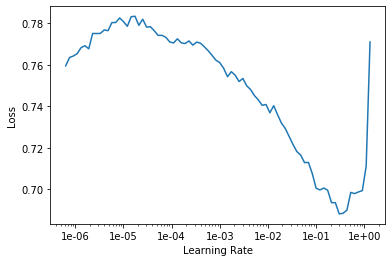

In [10]:
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.526039,0.417010,0.800946,01:30


In [12]:
learn.save('first')

In [13]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.473924,0.353151,0.851164,01:32


In [14]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.423275,0.307761,0.871907,01:37


In [15]:
learn.save('third')

In [6]:
learn.load("third")

RNNLearner(data=TextClasDataBunch;

Train: LabelList (6415 items)
x: TextList
xxbos xxmaj ürünün şık görünümü , kullanıcıya hitap eden özellikleri güzel bir ürün honor 10 lite magazaya teşekkürler . xxmaj kullanmaya yeni başladım gerçekten beğenilen bir telefon .,xxbos bence fatura ıle ılgılı sıkıntı yapıyolar guvenmeyın derım ben artık bu fırmadan almıyorum,xxbos xxup lg xxup g7 thinq’i tercih etme sebeplerim ise xxup 1-ips xxup lcd ekranın p - xxmaj oled ekrana göre daha uzun ömürlü olması . 2-ön kamera ve portre modu.3-i̇şlemci.4-ses kalitesi.5 - 4 g indirme hızı.6-bildirim ışığı . xxmaj şarj konusunda endişem vardı ancak oda yersizmiş . xxmaj birgün çok rahat çıkarttı .,xxbos evet istediğim gibi,xxbos xxmaj evet güzel ürün herkeze tavsiye ederim
y: CategoryList
1,0,1,1,1
Path: .;

Valid: LabelList (2748 items)
x: TextList
xxbos xxunk xxunk kullanıyorum çok güzel ama kulaklığı güzel değil şarz cihaz kablosu da güze değil biraz daha kaliteli olabilirdi l,xxbos xxmaj herne hikmetse iç

In [7]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.411634,0.283090,0.885371,02:38
1,0.385084,0.274783,0.887191,02:41


In [8]:
learn.save('final')

In [27]:
result =learn.predict("almayın kagro çok geç geldi")
print(result)
if(result[0]== Category(0,'Olumsuz')):
   print("Olumsuz yorum")
else:
   print("Olumlu yorum")

(Category 0, tensor(0), tensor([0.7869, 0.2131]))
Olumsuz yorum


C:\Users\Undefined\Anaconda3\envs\fastai2\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
